

# Lab 2 Project (Titanic)
**Author:** Elom Gbogbo 

**Date:** March 21, 2025

**Objective:** Predict passenger survival on the Titanic by building a classification model using key features such as class, gender, and age.



## Introduction
This project analyzes the Titanic dataset using Seaborn to predict passenger survival based on features like class, gender, and age. We’ll clean the data, train a classification model, and explore techniques to improve its performance.


## Imports
In the code cell below, import the necessary Python libraries for this notebook.  

In [134]:


# Import pandas for data manipulation and analysis (we might want to do more with it)
import pandas as pd

# Import pandas for data manipulation and analysis  (we might want to do more with it)
import numpy as np

# Import matplotlib for creating static visualizations
import matplotlib.pyplot as plt

# Import seaborn for statistical data visualization (built on matplotlib)
import seaborn as sns

# Import train_test_split for splitting data into training and test sets
from sklearn.model_selection import train_test_split

# Import LinearRegression for building a linear regression model
from sklearn.linear_model import LinearRegression

# Import performance metrics for model evaluation
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

from pandas.plotting import scatter_matrix

from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree




## Section 1. Import and Inspect the Data

### Load the Titanic dataset and inspect the data




In [135]:
# Load the Titanic dataset
titanic = sns.load_dataset('titanic')


## Section 2. Data Exploration and Preparation



### 2.1 Handle Missing Values and Clean Data

### 2.2 Handle Missing Values and Clean Data



In [136]:
# Impute missing values for age using the median:
titanic['age'].fillna(titanic['age'].median())


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [137]:

# Impute missing values for embark_town (or fill with mode)
titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

### 2.3 Feature Engineering

In [138]:
# Create a new feature: Family size
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

In [139]:
# Convert categorical data to numeric:
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [140]:
# Create a binary feature for 'alone':
titanic['alone'] = titanic['alone'].astype(int)

Reflection 2.3

1) Why might family size be a useful feature for predicting survival? I think that small family sizes may have had a better chance of survival compared to larger family sizes.

2) Why convert categorical data to numeric? It will make it easier for machine learning and to recognize patterns in algorithms. 


## Section 3. Feature Selection and Justification
### 3.1 Choose features and target

First: 

- input features: alone
- target: survived

Second:

- input features - age
- target: survived

Third:
- input features - age and family_size
- target: survived




### 3.2 Define X and y
- Assign input features to X a pandas DataFrame with 1 or more input features
- Assign target variable to y (as applicable) - a pandas Series with a single target feature
- Again - use comments to run a single case at a time
- The follow starts with only the statements needed for case 1. 
- Double brackets [[ ]]]  makes a 2D DataFrame
- Single brackets [ ]  make a 1D Series


In [141]:
# Case #1: alone only
X1 = titanic[['alone']]
y1 = titanic['survived']

# Case 2: age only (or your choice)
X2 = titanic[['age']]
y2 = titanic['survived']

# Case 3: age + family_size (or your choice)
X3 = titanic[['age', 'family_size']]
y3 = titanic['survived']

Reflection 3: 

Why are these features selected? These features were selected because they have significant influence to survival.

Are there any features that are likely to be highly predictive of survival? I believe that age, and family size will be highly predictive of survival. 

## Section 4. Train a Classification Model (Decision Tree) - Case #1

### 4.1 Split the Data 

Split the data into training and test sets. Use StratifiedShuffleSplit to ensure even class distribution.



In [142]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X_train = X1.iloc[train_indices]
    X_test = X1.iloc[test_indices]
    y_train = y1.iloc[train_indices]
    y_test = y1.iloc[test_indices]

print('Train size: ', len(X_train), 'Test size: ', len(X_test))


Train size:  712 Test size:  179


### 4.2 Create and Train Model (Decision Tree)

Create and train a decision tree model with no random initializer argument.

In [143]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

### 4.3 Predict and Evaluate Model Performance

Evaluate model performance on training data

In [144]:
# Predict and evaluate training data (X train)
y_pred = tree_model.predict(X_train)  
print("Results for Decision Tree on training data:")  
print(classification_report(y_train, y_pred)) 

Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       439
           1       0.50      0.51      0.51       273

    accuracy                           0.62       712
   macro avg       0.60      0.60      0.60       712
weighted avg       0.62      0.62      0.62       712



Evaluate model performance on test data:

In [145]:
# Predict and evaluate test data
y_test_pred = tree_model.predict(X_test)
print("Results for Decision Tree on test data:")
print(classification_report(y_test, y_test_pred))

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



### 4.4 Report Confusion Matrix (as a heatmap)

Plot a confusion matrix:


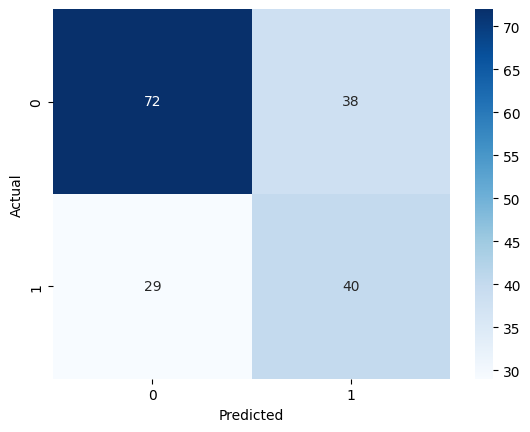

In [146]:
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 4.5 Report Decision Tree Plot

Plot the decision tree model. We give the plotter the names of the features and the names of the categories for the target. Save the image so we can use it in other places.



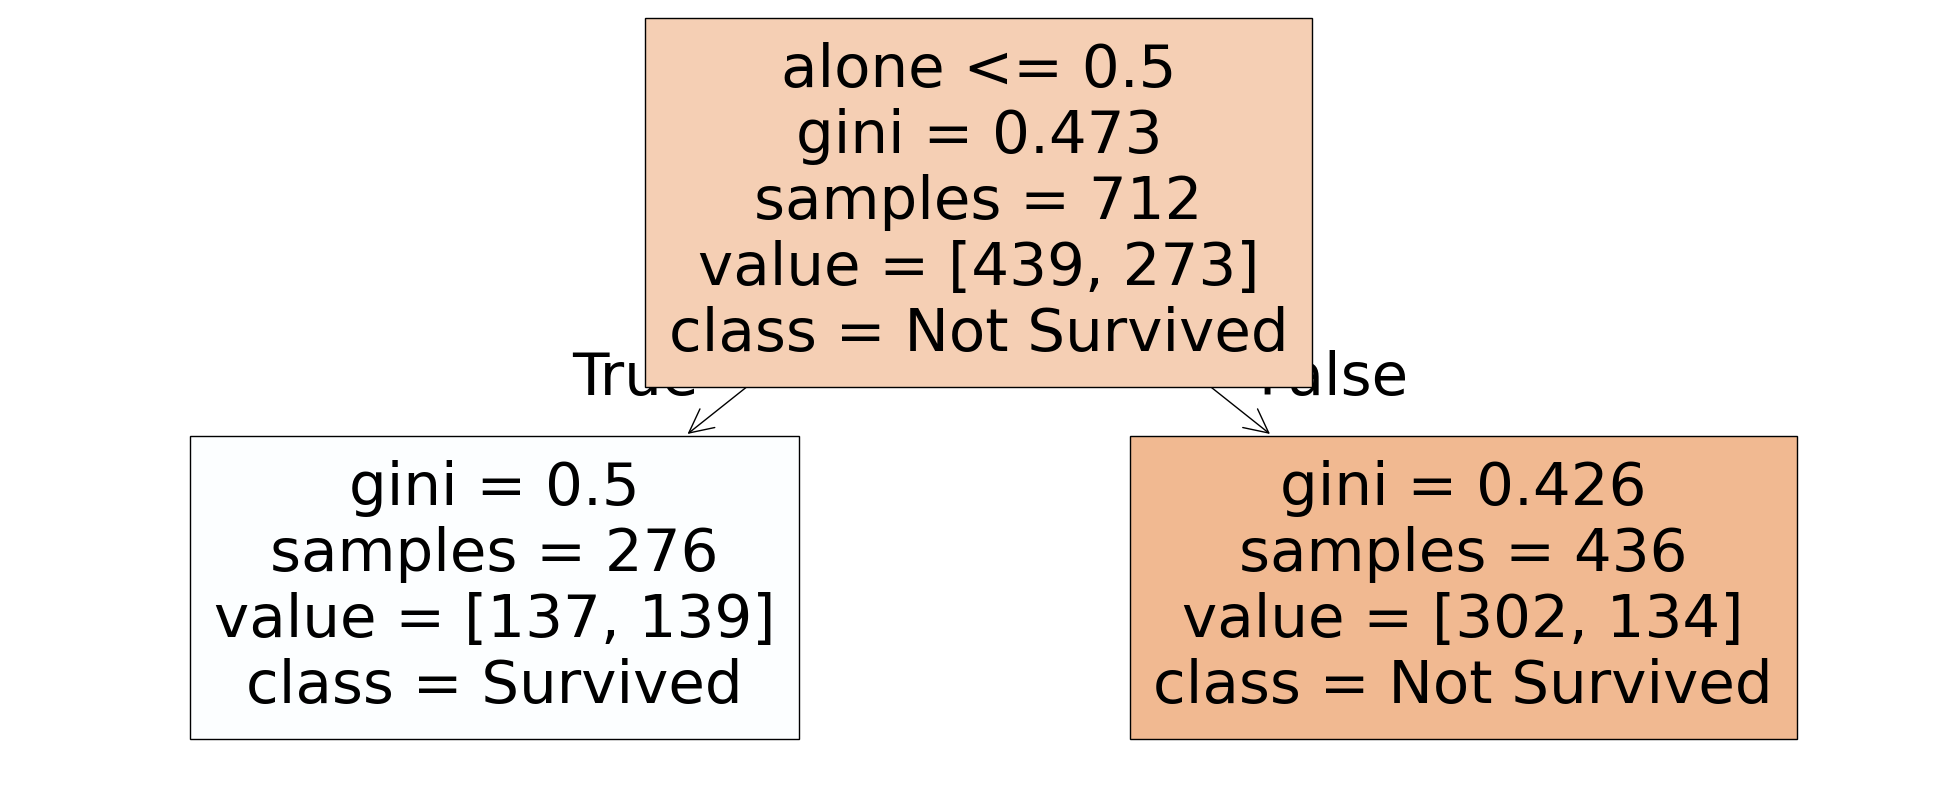

In [147]:
fig = plt.figure(figsize=(25,10))
plot_tree(tree_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig.savefig("decision_tree_titanic1.png")

## Section 4. Train a Classification Model (Decision Tree) - Case #2

### 4.1 Split the Data 

Split the data into training and test sets. Use StratifiedShuffleSplit to ensure even class distribution.

In [148]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X2, y2):
    X2_train = X2.iloc[train_indices]
    X2_test = X2.iloc[test_indices]
    y2_train = y2.iloc[train_indices]
    y2_test = y2.iloc[test_indices]

print('Train size: ', len(X2_train), 'Test size: ', len(X2_test))

Train size:  712 Test size:  179


### 4.2 Create and Train Model (Decision Tree)

Create and train a decision tree model with no random initializer argument.

In [149]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X2_train, y2_train)

DecisionTreeClassifier()

### 4.3 Predict and Evaluate Model Performance

Evaluate model performance on training data

In [150]:
# Predict and evaluate training data (X train)
y2_pred = tree_model.predict(X2_train)  
print("Results for Decision Tree on training data:")  
print(classification_report(y2_train, y2_pred)) 

Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.68      0.92      0.78       439
           1       0.69      0.29      0.41       273

    accuracy                           0.68       712
   macro avg       0.68      0.61      0.60       712
weighted avg       0.68      0.68      0.64       712



Evaluate model performance on test data:

In [151]:
# Predict and evaluate test data
y2_test_pred = tree_model.predict(X2_test)
print("Results for Decision Tree on test data:")
print(classification_report(y2_test, y2_test_pred))

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.63      0.89      0.74       110
           1       0.50      0.17      0.26        69

    accuracy                           0.61       179
   macro avg       0.57      0.53      0.50       179
weighted avg       0.58      0.61      0.55       179



### 4.4 Report Confusion Matrix (as a heatmap)

Plot a confusion matrix:

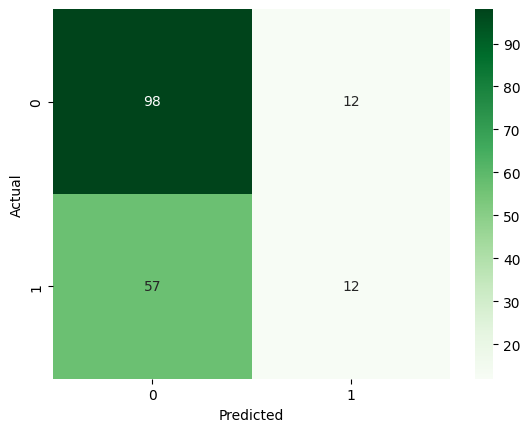

In [152]:
cm = confusion_matrix(y2_test, y2_test_pred)
sns.heatmap(cm, annot=True, cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 4.5 Report Decision Tree Plot

Plot the decision tree model. We give the plotter the names of the features and the names of the categories for the target. Save the image so we can use it in other places.



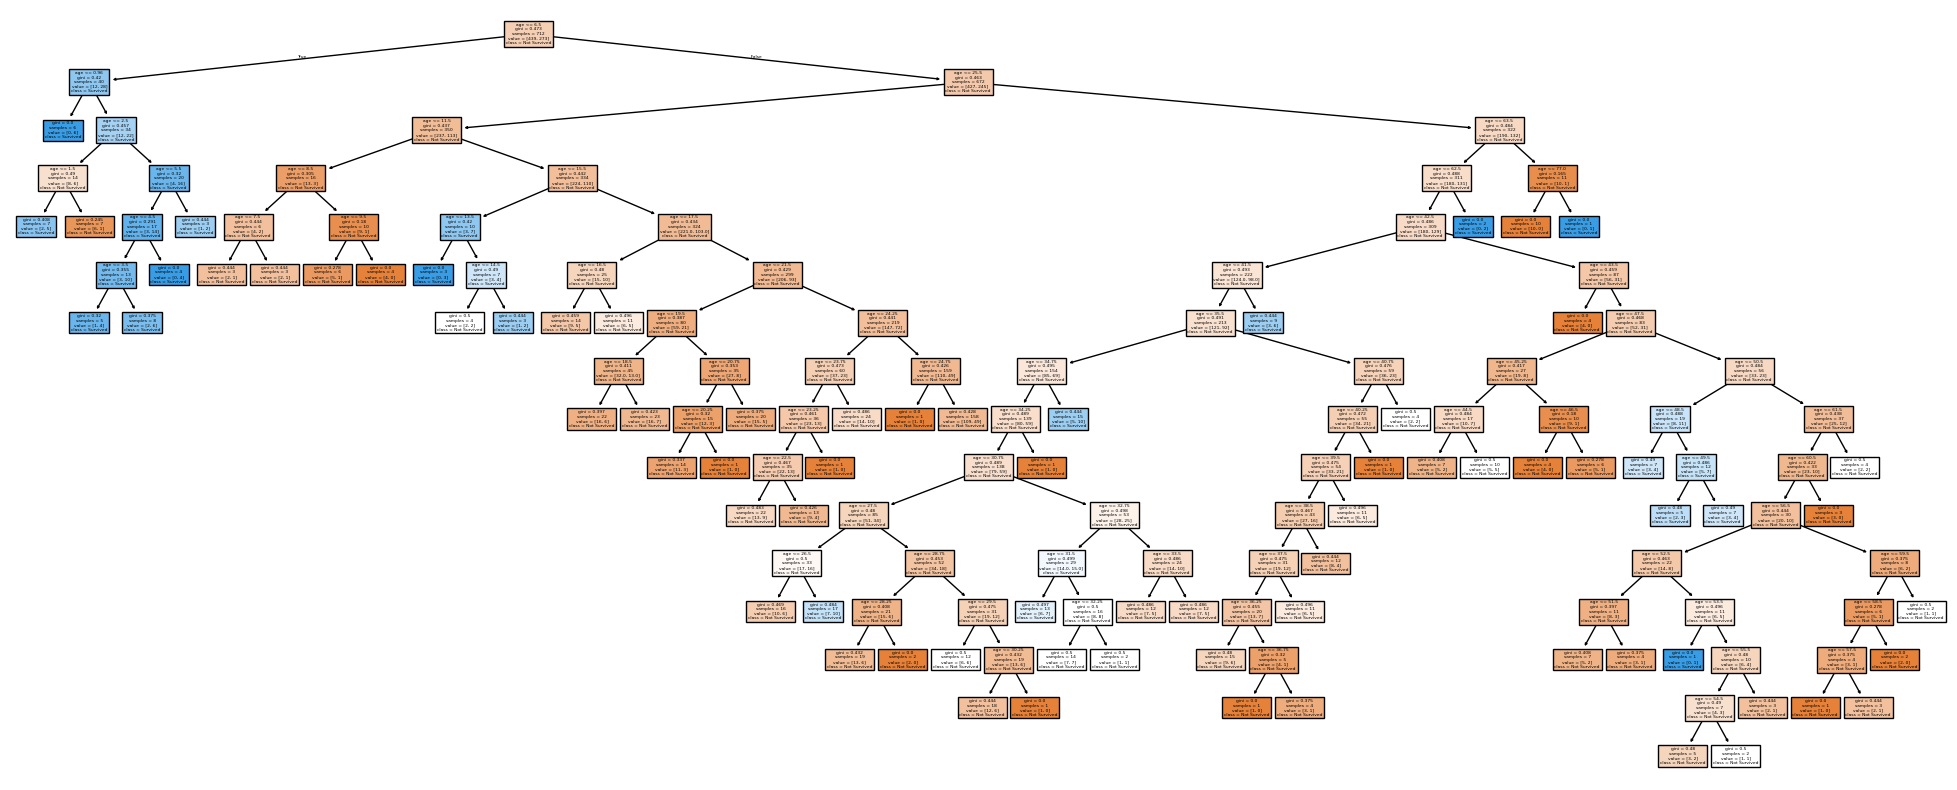

In [153]:
fig = plt.figure(figsize=(25,10))
plot_tree(tree_model, feature_names=X2.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig.savefig("decision_tree_titanic2.png")

## Section 4. Train a Classification Model (Decision Tree) - Case #3

### 4.1 Split the Data 

Split the data into training and test sets. Use StratifiedShuffleSplit to ensure even class distribution.

In [ ]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X3_train = X3.iloc[train_indices]
    X3_test = X3.iloc[test_indices]
    y3_train = y3.iloc[train_indices]
    y3_test = y3.iloc[test_indices]

print('Train size: ', len(X3_train), 'Test size: ', len(X3_test))

### 4.2 Create and Train Model (Decision Tree)

Create and train a decision tree model with no random initializer argument.

In [ ]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X3_train, y3_train)

### 4.3 Predict and Evaluate Model Performance

Evaluate model performance on training data

In [ ]:
# Predict and evaluate training data (X train)
y3_pred = tree_model.predict(X3_train)  
print("Results for Decision Tree on training data:")  
print(classification_report(y3_train, y3_pred)) 